# DSE 2262 MACHINE LEARNING LABORATORY


## Week 3 - EXERCISE 1:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

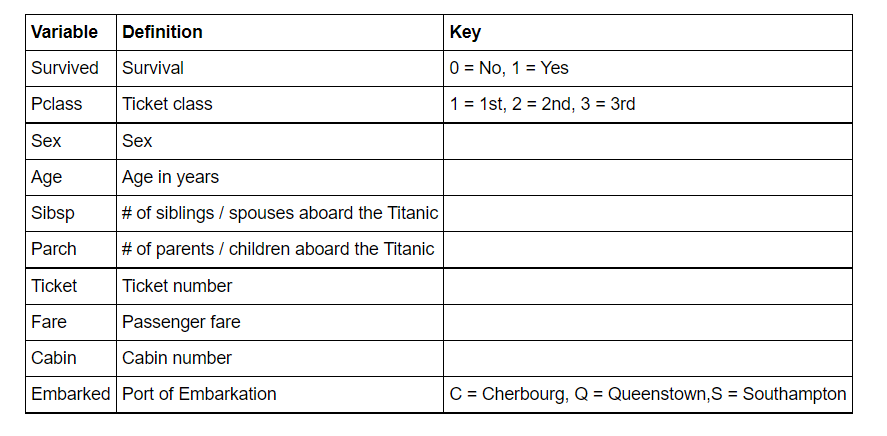



Pclass: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Age: 

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("/content/titanic_dataset.csv")

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Q1. Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.

In [4]:
df['Alone'] = df.Parch + df.SibSp
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
df = df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'], axis = 1)

In [6]:
df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
886,0,2,male,27.0,13.00,S,Without Family
887,1,1,female,19.0,30.00,S,Without Family
888,0,3,female,NaN,23.45,S,With Family
889,1,1,male,26.0,30.00,C,Without Family
890,0,3,male,32.0,7.75,Q,Without Family


## Q2. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step. 

In [7]:
features_numerical = ['Age', 'Fare']
features_categorical = ['Embarked', 'Sex', 'Pclass']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('Features numericas', numeric_transformer, features_numerical),
        ('Features categoricas', categorical_transformer, features_categorical)])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'],axis=1), df['Survived'], test_size=0.33, random_state=42)

## Q3. Perform Bayes classification using cross validation.

In [9]:
model = Pipeline([('preprocessor', preprocessor),('clf', GaussianNB())])
model.fit(X_train, y_train)
accuracy = round(model.score(X_train, y_train) * 100, 2)
print(f"Accuracy of model: {accuracy}%")

Accuracy of model: 77.18%


In [10]:

scores = cross_val_score(model, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.05


In [11]:
scores = cross_val_score(model, X_test, y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.03


## Q4. Tabulate using relevant measures of accuracy , Sensitivity and specificity

In [12]:
y_pred = model.predict(X_test)
print('confusion matrix :\n',confusion_matrix(y_test,y_pred))
print('precision_score :\n',precision_score(y_test,y_pred,pos_label=1))
print('recall_score :\n',recall_score(y_test,y_pred,pos_label=1))
print('classification_report :\n',classification_report(y_test,y_pred))

confusion matrix :
 [[133  42]
 [ 26  94]]
precision_score :
 0.6911764705882353
recall_score :
 0.7833333333333333
classification_report :
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       175
           1       0.69      0.78      0.73       120

    accuracy                           0.77       295
   macro avg       0.76      0.77      0.77       295
weighted avg       0.78      0.77      0.77       295



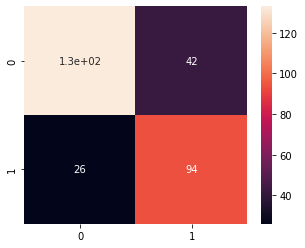

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [14]:
confusion_matrix1 = confusion_matrix(y_test,y_pred)
FN = confusion_matrix1[0][1]
FP = confusion_matrix1[1][0]
TP = confusion_matrix1[1][1]
TN = confusion_matrix1[0][0]
TPR = TP/(TP+FN)
TNR = TN /(TN+FP)
FPR=1-TPR
FNR=1-TNR
print("True Positive Rate - "+str(TPR))
print("True Negative Rate - "+str(TNR))
print("False Positive Rate - "+str(FPR))
print("False Negative Rate - "+str(FNR))
print("Sensitivity - "+str(TPR))
print("Specificity - "+str(TNR))

True Positive Rate - 0.6911764705882353
True Negative Rate - 0.8364779874213837
False Positive Rate - 0.3088235294117647
False Negative Rate - 0.16352201257861632
Sensitivity - 0.6911764705882353
Specificity - 0.8364779874213837


## Q5. Visualize the ROC curve and comment on performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


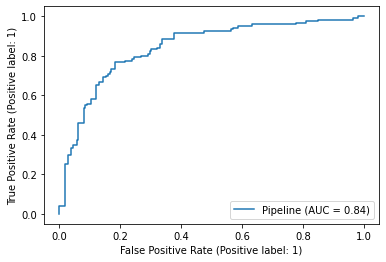

In [15]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test) 

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.



**Since AUC -0.84 . Thus we can say the Model is good enough to predict whether a person who boarded titanic will survive or not.**